In [111]:
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np

In [76]:
import sys
sys.version_info
    

sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)

In [77]:
response  = requests.get("http://0.0.0.0:8000/api/v1/timecourses_elastic/?substance=caffeine")

In [78]:
response.json()["data"]["data"]

[{'pk': 1,
  'pktype': 'concentration',
  'tissue': 'plasma',
  'substance': {'name': 'caffeine'},
  'time': [0.0, 0.2, 0.4, 0.7, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0, 24.0, 36.0],
  'time_unit': 'h',
  'value': None,
  'mean': [0.0,
   5.315,
   4.64,
   5.378,
   4.724,
   4.377,
   3.28,
   3.734,
   3.07,
   2.459,
   1.743,
   0.692,
   0.347],
  'median': None,
  'min': None,
  'max': None,
  'sd': [None,
   None,
   None,
   None,
   0.791,
   0.675,
   0.443,
   0.517,
   0.58,
   0.517,
   0.453,
   0.274,
   0.169],
  'se': None,
  'cv': None,
  'unit': 'µg/ml',
  'group': {'pk': 5, 'name': 'control'},
  'individual': None,
  'final': False,
  'interventions': [{'pk': 2, 'name': 'Dcaf'}],
  'figure': '/media/data/Akinyinka2000_Fig1.png',
  'auc_end': 58.012,
  'kel': 0.07514232232501904},
 {'pk': 2,
  'pktype': 'concentration',
  'tissue': 'plasma',
  'substance': {'name': 'caffeine'},
  'time': [0.0, 0.2, 0.4, 0.7, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0, 24.0, 36.0],
  'time_unit'

In [79]:
num_pages = response.json()["last_page"]

In [80]:
for page in range(2,num_pages +1 ):
    print(page)

2
3
4


In [81]:
response  = requests.get("http://0.0.0.0:8000/api/v1/outputs_elastic/?substance=caffeine&pktype__in=auc_end__auc_inf&final=true")
#response  = requests.get("http://0.0.0.0:8000/api/v1/outputs_elastic/?substance=caffeine&pktype=auc_inf")

In [82]:
num_pages = response.json()["last_page"]
response.json()


{'current_page': 1,
 'last_page': 11,
 'next_page_url': 'http://0.0.0.0:8000/api/v1/outputs_elastic/?final=true&page=2&pktype__in=auc_end__auc_inf&substance=caffeine',
 'prev_page_url': None,
 'data': {'count': 209,
  'data': [{'pk': 1336,
    'pktype': 'auc_end',
    'tissue': 'plasma',
    'substance': {'name': 'caffeine'},
    'time': 24.0,
    'time_unit': 'h',
    'value': '30.91',
    'mean': None,
    'median': None,
    'min': None,
    'max': None,
    'sd': None,
    'se': None,
    'cv': None,
    'unit': 'mg*h/l',
    'group': None,
    'individual': {'pk': 223, 'name': '1'},
    'final': True,
    'interventions': [{'pk': 34, 'name': 'Dcaf'}]},
   {'pk': 1337,
    'pktype': 'auc_end',
    'tissue': 'plasma',
    'substance': {'name': 'caffeine'},
    'time': 24.0,
    'time_unit': 'h',
    'value': '42.71',
    'mean': None,
    'median': None,
    'min': None,
    'max': None,
    'sd': None,
    'se': None,
    'cv': None,
    'unit': 'mg*h/l',
    'group': None,
    'in

In [83]:
num_pages


11

In [84]:
response.json()["data"]["data"]

[{'pk': 1336,
  'pktype': 'auc_end',
  'tissue': 'plasma',
  'substance': {'name': 'caffeine'},
  'time': 24.0,
  'time_unit': 'h',
  'value': '30.91',
  'mean': None,
  'median': None,
  'min': None,
  'max': None,
  'sd': None,
  'se': None,
  'cv': None,
  'unit': 'mg*h/l',
  'group': None,
  'individual': {'pk': 223, 'name': '1'},
  'final': True,
  'interventions': [{'pk': 34, 'name': 'Dcaf'}]},
 {'pk': 1337,
  'pktype': 'auc_end',
  'tissue': 'plasma',
  'substance': {'name': 'caffeine'},
  'time': 24.0,
  'time_unit': 'h',
  'value': '42.71',
  'mean': None,
  'median': None,
  'min': None,
  'max': None,
  'sd': None,
  'se': None,
  'cv': None,
  'unit': 'mg*h/l',
  'group': None,
  'individual': {'pk': 224, 'name': '2'},
  'final': True,
  'interventions': [{'pk': 34, 'name': 'Dcaf'}]},
 {'pk': 1338,
  'pktype': 'auc_end',
  'tissue': 'plasma',
  'substance': {'name': 'caffeine'},
  'time': 24.0,
  'time_unit': 'h',
  'value': '20.09',
  'mean': None,
  'median': None,
  'min

In [85]:

df = pd.DataFrame(response.json()["data"]["data"])


In [86]:
df

,cv,final,group,individual,interventions,max,mean,median,min,pk,pktype,sd,se,substance,time,time_unit,tissue,unit,value
0,None,True,None,"{'pk': 223, 'name': '1'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1336,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,30.91
1,None,True,None,"{'pk': 224, 'name': '2'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1337,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,42.71
2,None,True,None,"{'pk': 225, 'name': '3'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1338,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,20.09
3,None,True,None,"{'pk': 226, 'name': '4'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1339,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,86.67
4,None,True,None,"{'pk': 227, 'name': '5'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1340,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,34.24
5,None,True,None,"{'pk': 228, 'name': '6'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1341,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,49.87
6,None,True,None,"{'pk': 223, 'name': '1'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1378,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,30.91
7,None,True,None,"{'pk': 224, 'name': '2'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1379,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,42.71
8,None,True,None,"{'pk': 225, 'name': '3'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1380,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,20.09
9,None,True,None,"{'pk': 226, 'name': '4'}","[{'pk': 34, 'name': 'Dcaf'}]",None,None,None,None,1381,auc_end,None,None,{'name': 'caffeine'},24.0,h,plasma,mg*h/l,86.67


In [97]:
data = []
query = "http://0.0.0.0:8000/api/v1/outputs_elastic/?substance=caffeine&pktype=clearance&final=true"

for page in range(2,num_pages +1):
    url = query + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]

In [103]:
df  = pd.DataFrame(data)
df["time"].unique()
df["tissue"].unique()

array(['plasma', 'saliva'], dtype=object)

In [116]:
#df["substance"] = df["substance"].apply(lambda x: x.get("name") if x else None)
df["value"] = pd.to_numeric(df["value"])
df.sort_values(by="value", ascending=False)
               
units = df.unit.unique()
units_factor = {'ml/min/kg':60 ,'ml/min':np.NaN, 'ml/h/kg':1 }
#df["norm_value"] = 

In [124]:
units_factor[df.iloc[0]["unit"]]*df.iloc[0]["value"]


104.4

In [144]:
def norm_value(df_row):
    if df_row.value:
        value = df_row.value
    elif df_row.mean:
        value = df_row.mean
        
    factor = units_factor[df_row.unit]
    return value * factor


In [145]:
df["norm_unit"] = None
df["norm_value"] = df.apply(norm_value,axis=1)

In [147]:
norm_clearance = df["norm_value"].dropna()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


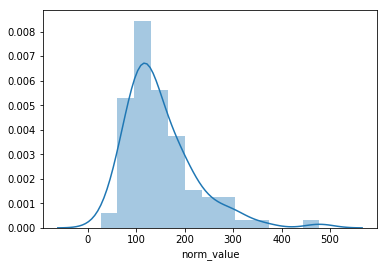

In [148]:
sns.distplot(norm_clearance)

In [150]:
df["individual_pk"] = df["individual"].apply(lambda x: x.get("pk") if x else None)
df["group_pk"] = df["group"].apply(lambda x: x.get("pk") if x else None)


In [160]:
individual_ids = list(df["individual_pk"].dropna().unique())


AttributeError: 'list' object has no attribute 'join'

In [164]:
ids = "__".join([str(int(id)) for id in individual_ids])
response  = requests.get(f"http://0.0.0.0:8000/api/v1/individuals_elastic/?ids{ids}")


In [165]:
response  = requests.get(f"http://0.0.0.0:8000/api/v1/individuals_elastic/?ids{ids}")


In [168]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

In [177]:
from pandas.io.json import json_normalize

sample_object = [flatten_json(d) for d in response.json()["data"]["data"]]

#json_normalize(sample_object)
pd.DataFrame(sample_object)

,characteristica_all_final_0_category,characteristica_all_final_0_choice,characteristica_all_final_0_count,characteristica_all_final_0_ctype,characteristica_all_final_0_cv,characteristica_all_final_0_max,characteristica_all_final_0_mean,characteristica_all_final_0_median,characteristica_all_final_0_min,characteristica_all_final_0_pk,...,characteristica_all_final_9_sd,characteristica_all_final_9_se,characteristica_all_final_9_unit,characteristica_all_final_9_value,group_name,group_pk,name,pk,study_name,study_pk
0,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,1,1,Abernethy1985,4029248
1,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,2,2,Abernethy1985,4029248
2,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,3,3,Abernethy1985,4029248
3,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,4,4,Abernethy1985,4029248
4,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,5,5,Abernethy1985,4029248
5,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,6,6,Abernethy1985,4029248
6,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,7,7,Abernethy1985,4029248
7,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,8,8,Abernethy1985,4029248
8,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,OCS,2,9,9,Abernethy1985,4029248
9,smoking,N,18,group,None,None,None,None,None,1,...,NaN,NaN,NaN,NaN,control,3,10,10,Abernethy1985,4029248


In [176]:
sample_object

[{'pk': 1,
  'group_pk': 2,
  'group_name': 'OCS',
  'name': '1',
  'study_pk': '4029248',
  'study_name': 'Abernethy1985',
  'characteristica_all_final_0_pk': 1,
  'characteristica_all_final_0_count': 18,
  'characteristica_all_final_0_category': 'smoking',
  'characteristica_all_final_0_choice': 'N',
  'characteristica_all_final_0_ctype': 'group',
  'characteristica_all_final_0_value': None,
  'characteristica_all_final_0_mean': None,
  'characteristica_all_final_0_median': None,
  'characteristica_all_final_0_min': None,
  'characteristica_all_final_0_max': None,
  'characteristica_all_final_0_sd': None,
  'characteristica_all_final_0_se': None,
  'characteristica_all_final_0_cv': None,
  'characteristica_all_final_0_unit': None,
  'characteristica_all_final_1_pk': 2,
  'characteristica_all_final_1_count': 18,
  'characteristica_all_final_1_category': 'age',
  'characteristica_all_final_1_choice': None,
  'characteristica_all_final_1_ctype': 'group',
  'characteristica_all_final_1_v

In [90]:
df["individual_pk"] = df["individual"].apply(lambda x: x.get("pk") if x else None)
df["group_pk"] = df["group"].apply(lambda x: x.get("pk") if x else None)
df["substance"] = df["substance"].apply(lambda x: x.get("name") if x else None)

In [91]:
slim_df = df[["unit","value","mean"]]

In [92]:
slim_df["value"] = pd.to_numeric(slim_df["value"])
slim_df["mean"] = pd.to_numeric(slim_df["mean"])


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
slim_df

,unit,value,mean
0,mg*h/l,42.71,NaN
1,mg*h/l,20.09,NaN
2,mg*h/l,86.67,NaN
3,mg*h/l,34.24,NaN
4,mg*h/l,49.87,NaN
5,mg*h/l,45.88,NaN
6,mg*h/l,50.08,NaN
7,mg*h/l,32.18,NaN
8,mg*h/l,116.22,NaN
9,mg*h/l,48.93,NaN


In [30]:
pd.to_numeric(df["mean"]).dropna()

23      10200.00
24      32640.00
25      58620.00
26     309840.00
27     408900.00
28         20.60
29         21.40
30         21.80
31         21.40
32         22.40
33         20.40
34         20.00
35         21.80
36         22.60
37         25.00
38         35.20
39         32.20
40         47.60
41         60.20
42        100.80
43         24.90
44         20.30
45         60.80
46          0.02
47          0.03
48         15.50
49         12.00
76       4142.50
77       4143.30
78       4143.30
         ...    
80       4143.30
81       4143.30
82       4143.30
83       4143.30
84       4143.30
85       4143.30
86       4143.30
87       4143.30
88       4143.30
89       4143.30
90       4143.30
91       4143.30
92       4143.30
93       4143.30
94       4143.30
95       4143.30
96       4143.30
97       4143.30
98       4143.30
99       4143.30
100      4143.30
101      4143.30
102      4143.30
103      4143.30
104      4143.30
143         0.02
144         0.04
145         0.

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


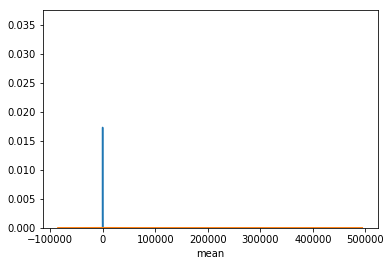

In [29]:
sns.distplot(pd.to_numeric(df["value"]).dropna())
sns.distplot(pd.to_numeric(df["mean"]).dropna())

In [60]:
num_pages = requests.get("http://0.0.0.0:8000/api/v1/timecourses_elastic/?substance=caffeine&final=true").json()["last_page"]
list(range(num_pages))

[0, 1, 2]

In [61]:
data = []
query = "http://0.0.0.0:8000/api/v1/timecourses_elastic/?substance=caffeine&final=true"
for page in range(2, num_pages+1):
    url = query + f"&page={page}"
    response = requests.get(url)
    data += response.json()["data"]["data"]

In [72]:
df = pd.DataFrame(data)
kels = pd.to_numeric(df['kel']).dropna()
units =   df["unit"]  

In [73]:
units

0     µmol/l
1     µmol/l
2       µmol
3       µmol
4       µmol
5       µmol
6       mg/l
7       mg/l
8      µg/ml
9       mg/l
10      mg/l
11     µg/ml
12     µg/ml
13     µg/ml
14     µg/ml
15     µg/ml
16     µg/ml
17     µg/ml
18     µg/ml
19     µg/ml
20     µg/ml
21     µg/ml
22     µg/ml
23     µg/ml
24     µg/ml
25     µg/ml
26     µg/ml
Name: unit, dtype: object

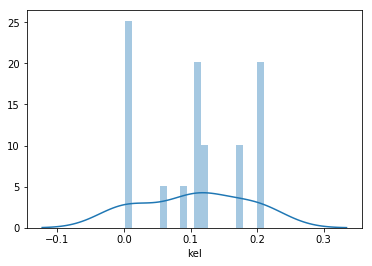

In [68]:
sns.distplot(kels,bins=20)

In [69]:
kels

0     0.056498
6     0.001576
8     0.169608
10    0.120787
11    0.205900
13    0.094872
14    0.200587
15    0.208116
16    0.171602
17    0.210196
18    0.117274
19    0.110645
20    0.107906
21    0.107728
22    0.109069
23    0.002168
24    0.002703
25    0.001700
26    0.001220
Name: kel, dtype: float64